# 毕业论文`GRAD`
## 绘制总结概念图

---
*@author: Evan*\
*@date: 2024-03-17*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('../../data/summary/forbar.xlsx',index_col=0)
df

,year,season,week
obs1,110.570000,94.600000,92.400000
obs2,146.970000,146.970000,210.300000
sim1,104.610000,93.350000,93.400000
sim2,139.510000,141.510000,194.600000
sen,113.410000,125.590000,NaN
ALL,36.400000,52.370000,117.900000
MET,8.800000,32.240000,101.200000
EMIS,26.100000,15.920000,15.700000
MET_ratio,0.241758,0.615620,0.858355
EMIS_ratio,0.717033,0.303991,0.133164


In [79]:
year_bar1 = df['year']['obs1'] # OBS1
year_bar2 = df['year']['obs2'] # OBS2
year_box1 = df['year']['MET'] # MET
year_box2 = df['year']['EMIS'] # EMIS

season_bar1 = df['season']['obs1']
season_bar2 = df['season']['obs2']
season_box1 = df['season']['MET']
season_box2 = df['season']['EMIS']

scale = 2.5
week_bar1 = df['week']['obs1']/scale
week_bar2 = df['week']['obs2']/scale
week_box1 = df['week']['MET']/scale
week_box2 = df['week']['EMIS']/scale

year_ratio1 = df['year']['MET_ratio']*100
year_ratio2 = df['year']['EMIS_ratio']*100

season_ratio1 = df['season']['MET_ratio']*100
season_ratio2 = df['season']['EMIS_ratio']*100

week_ratio1 = df['week']['MET_ratio']*100
week_ratio2 = df['week']['EMIS_ratio']*100

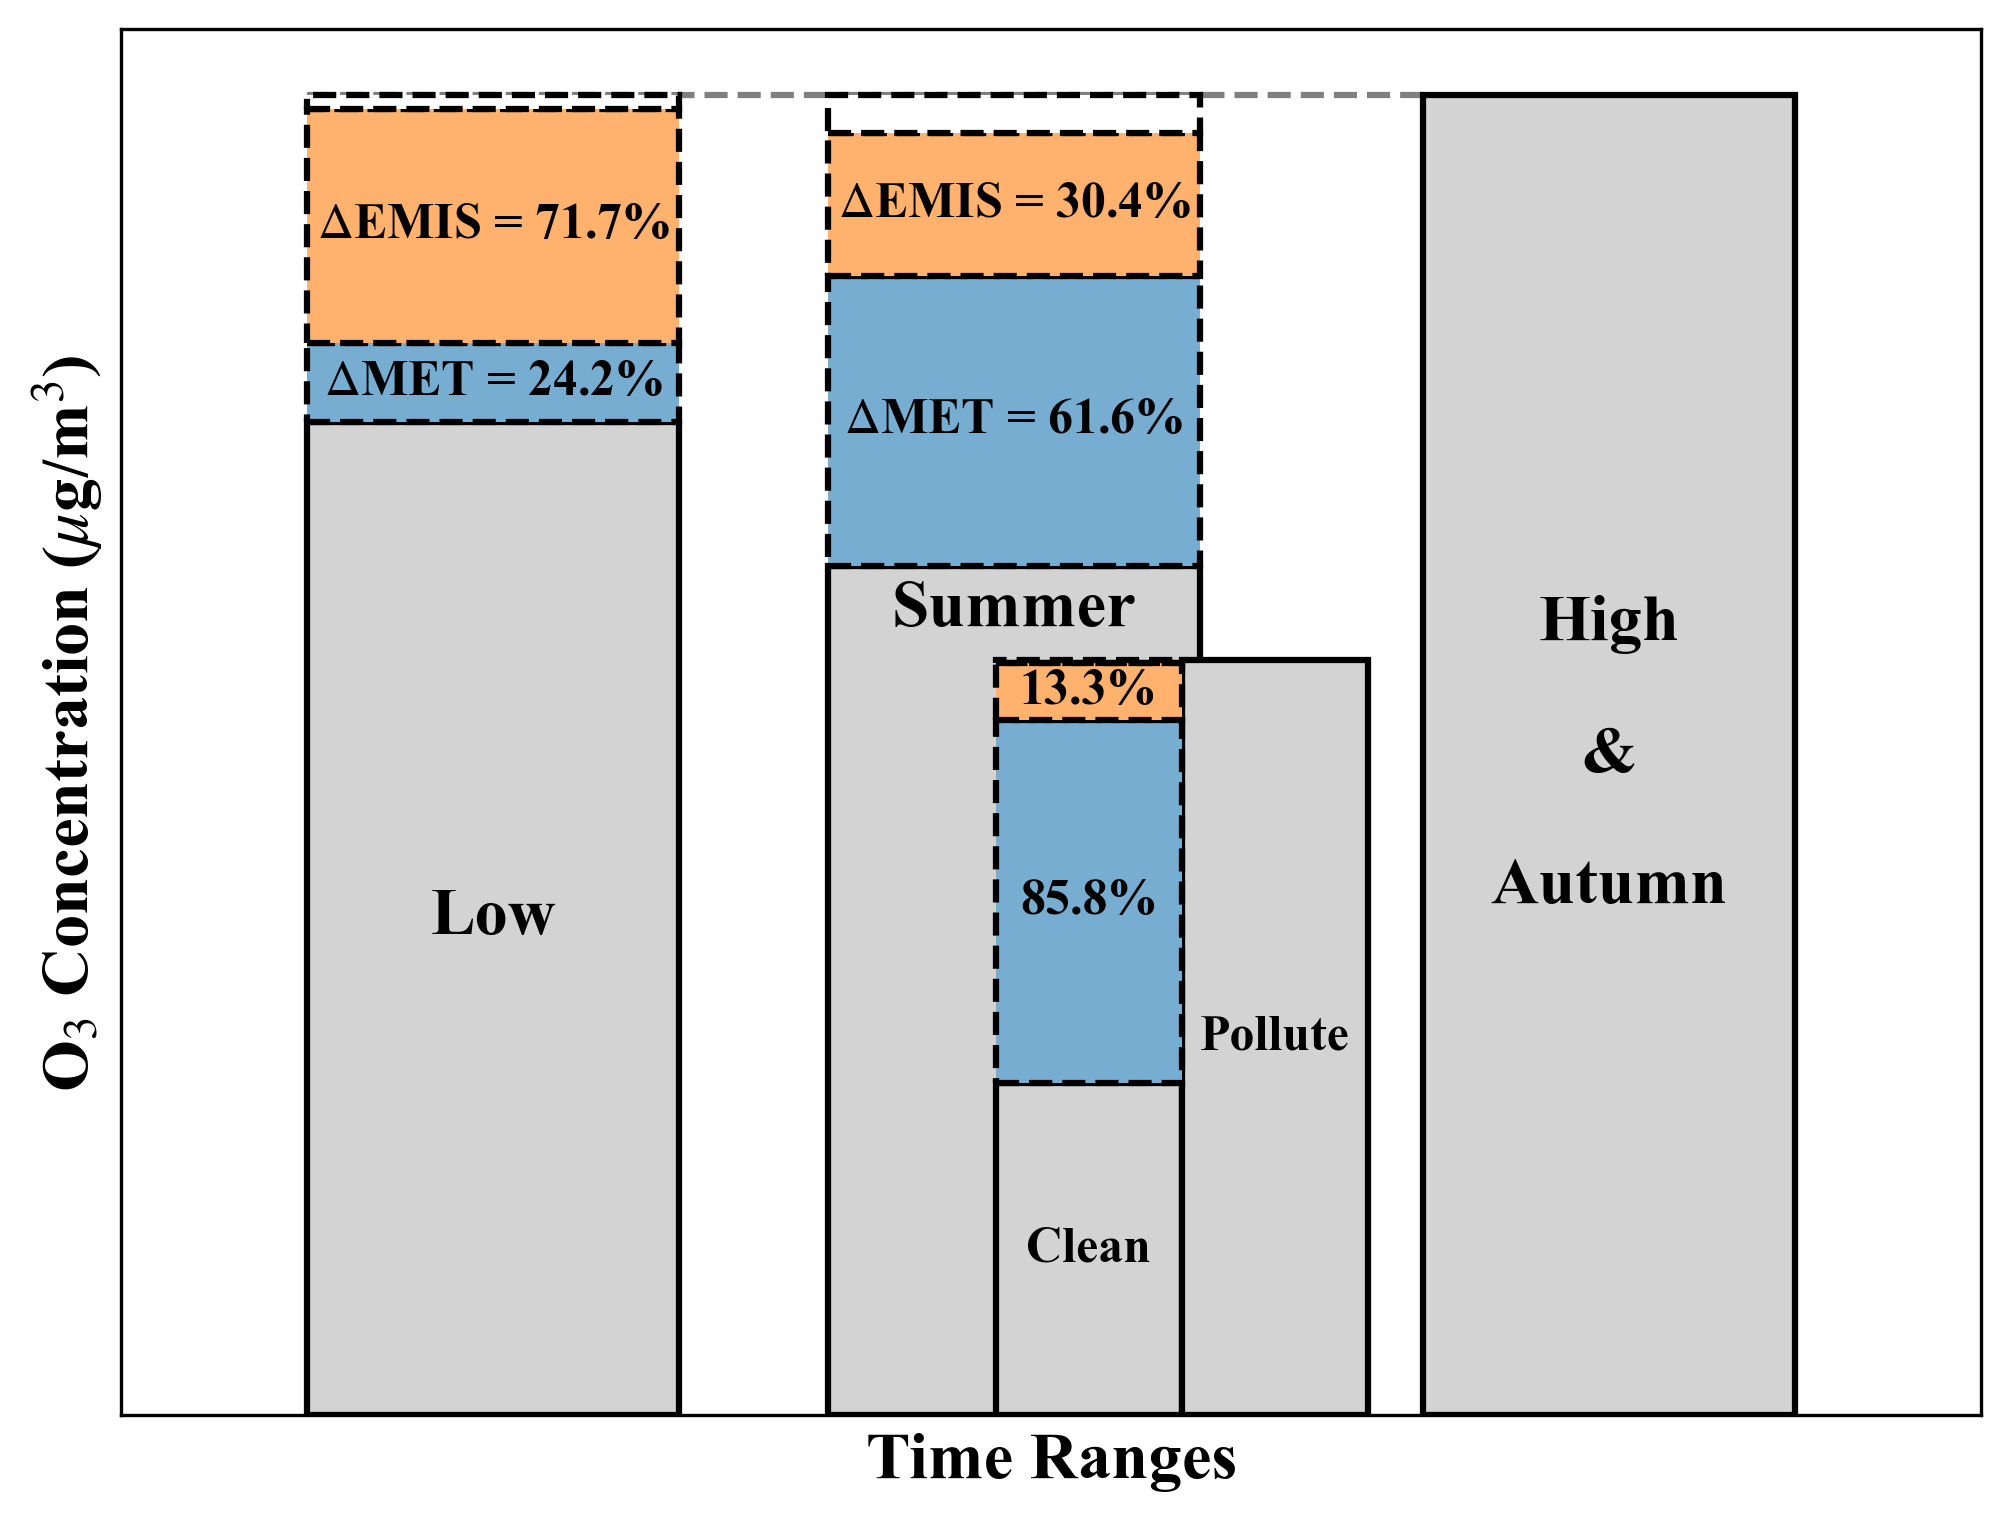

In [103]:
offset = 0.

lowloc = 0.5
highloc = 3.5
summerloc = 1.9 + offset
autumnloc = highloc
cleanloc = 2.1 + offset
polluteloc = 2.6 + offset

width1 = 1
width2 = 0.5

fig = plt.figure(figsize=(8, 6),dpi=300)
ax = fig.subplots(1, 1)

ax.bar(lowloc,year_bar1,width=width1,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(highloc,year_bar2,width=width1,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(summerloc,season_bar1,width=width1,color='lightgray',edgecolor='black',linewidth=1.5)

ax.bar(cleanloc,week_bar1,width=width2,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(polluteloc,week_bar2,width=width2,color='lightgray',edgecolor='black',linewidth=1.5)

# ============================
ax.axhline(y=year_bar2,xmin=lowloc/5,xmax=highloc/5,color='gray',linestyle='--',zorder=0)
ax.axhline(y=week_bar2,xmin=(cleanloc+0.5-(width2/2))/5,xmax=polluteloc/5,color='gray',linestyle='--',zorder=0)

# ============================
# year
ax.bar(lowloc,year_box1,width=width1,bottom=year_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_box2,width=width1,bottom=year_bar1+year_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_bar2-year_bar1-year_box1-year_box2,width=width1,bottom=year_bar1+year_box1+year_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# season
ax.bar(summerloc,season_box1,width=width1,bottom=season_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_box2,width=width1,bottom=season_bar1+season_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_bar2-season_bar1-season_box1-season_box2,width=width1,bottom=season_bar1+season_box1+season_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# week
ax.bar(cleanloc,week_box1,width=width2,bottom=week_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_box2,width=width2,bottom=week_bar1+week_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_bar2-week_bar1-week_box1-week_box2,width=width2,bottom=week_bar1+week_box1+week_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# ============================
textdict = dict(fontsize=16,fontweight='bold',color='black',ha='center',va='center')
ratiodict = dict(fontsize=12,fontweight='bold',color='black',ha='center',va='center')
# Low
ax.text(lowloc,year_bar1/2,s='Low',**textdict)
ax.text(lowloc,year_bar1+year_box1/2,s=f'$\Delta$MET = {year_ratio1:.1f}%',**ratiodict)
ax.text(lowloc,year_bar1+year_box1+year_box2/2,s=f'$\Delta$EMIS = {year_ratio2:.1f}%',**ratiodict)
# Summer
ax.text(summerloc,season_bar1-5,s='Summer',**textdict)
ax.text(summerloc,season_bar1+season_box1/2,s=f'$\Delta$MET = {season_ratio1:.1f}%',**ratiodict)
ax.text(summerloc,season_bar1+season_box1+season_box2/2,s=f'$\Delta$EMIS = {season_ratio2:.1f}%',**ratiodict)
# High and Autumn
ax.text(highloc,year_bar2/2,s='High\n\n&\n\nAutumn',**textdict)
# Clean
textdict2 = dict(fontsize=12,fontweight='bold',color='black',ha='center',va='center')
ratiodict2 = dict(fontsize=6,fontweight='bold',color='black',ha='center',va='center')

ax.text(cleanloc,week_bar1/2,s='Clean',**textdict2)
# ax.text(cleanloc,week_bar1+week_box1/2,s=f'$\Delta$MET = {week_ratio1:.1f}%',**ratiodict2)
# ax.text(cleanloc,week_bar1+week_box1+week_box2/2,s=f'$\Delta$EMIS = {week_ratio2:.1f}%',**ratiodict2)

ax.text(cleanloc,week_bar1+week_box1/2,s=f'{week_ratio1:.1f}%',**ratiodict)
ax.text(cleanloc,week_bar1+week_box1+week_box2/2,s=f'{week_ratio2:.1f}%',**ratiodict)
# Pollute
ax.text(polluteloc,week_bar2/2,s='Pollute',**textdict2)

# ============================
labeldict = dict(fontsize=16,fontweight='bold')
# ax.set_xticks([lowloc,summerloc,cleanloc,polluteloc,highloc])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time Ranges',**labeldict)
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)',**labeldict)

ax.set_xlim(-0.5,4.5)
plt.show()

效果不佳，不能让人一眼看明白这张图在说什么

# 换一种图

In [113]:
year_bar1 = df['year']['obs1'] # OBS1
year_bar2 = df['year']['obs2'] # OBS2
year_box1 = df['year']['MET'] # MET
year_box2 = df['year']['EMIS'] # EMIS

season_bar1 = df['season']['obs1']
season_bar2 = df['season']['obs2']
season_box1 = df['season']['MET']
season_box2 = df['season']['EMIS']

scale = 1
week_bar1 = df['week']['obs1']/scale
week_bar2 = df['week']['obs2']/scale
week_box1 = df['week']['MET']/scale
week_box2 = df['week']['EMIS']/scale

year_ratio1 = df['year']['MET_ratio']*100
year_ratio2 = df['year']['EMIS_ratio']*100

season_ratio1 = df['season']['MET_ratio']*100
season_ratio2 = df['season']['EMIS_ratio']*100

week_ratio1 = df['week']['MET_ratio']*100
week_ratio2 = df['week']['EMIS_ratio']*100

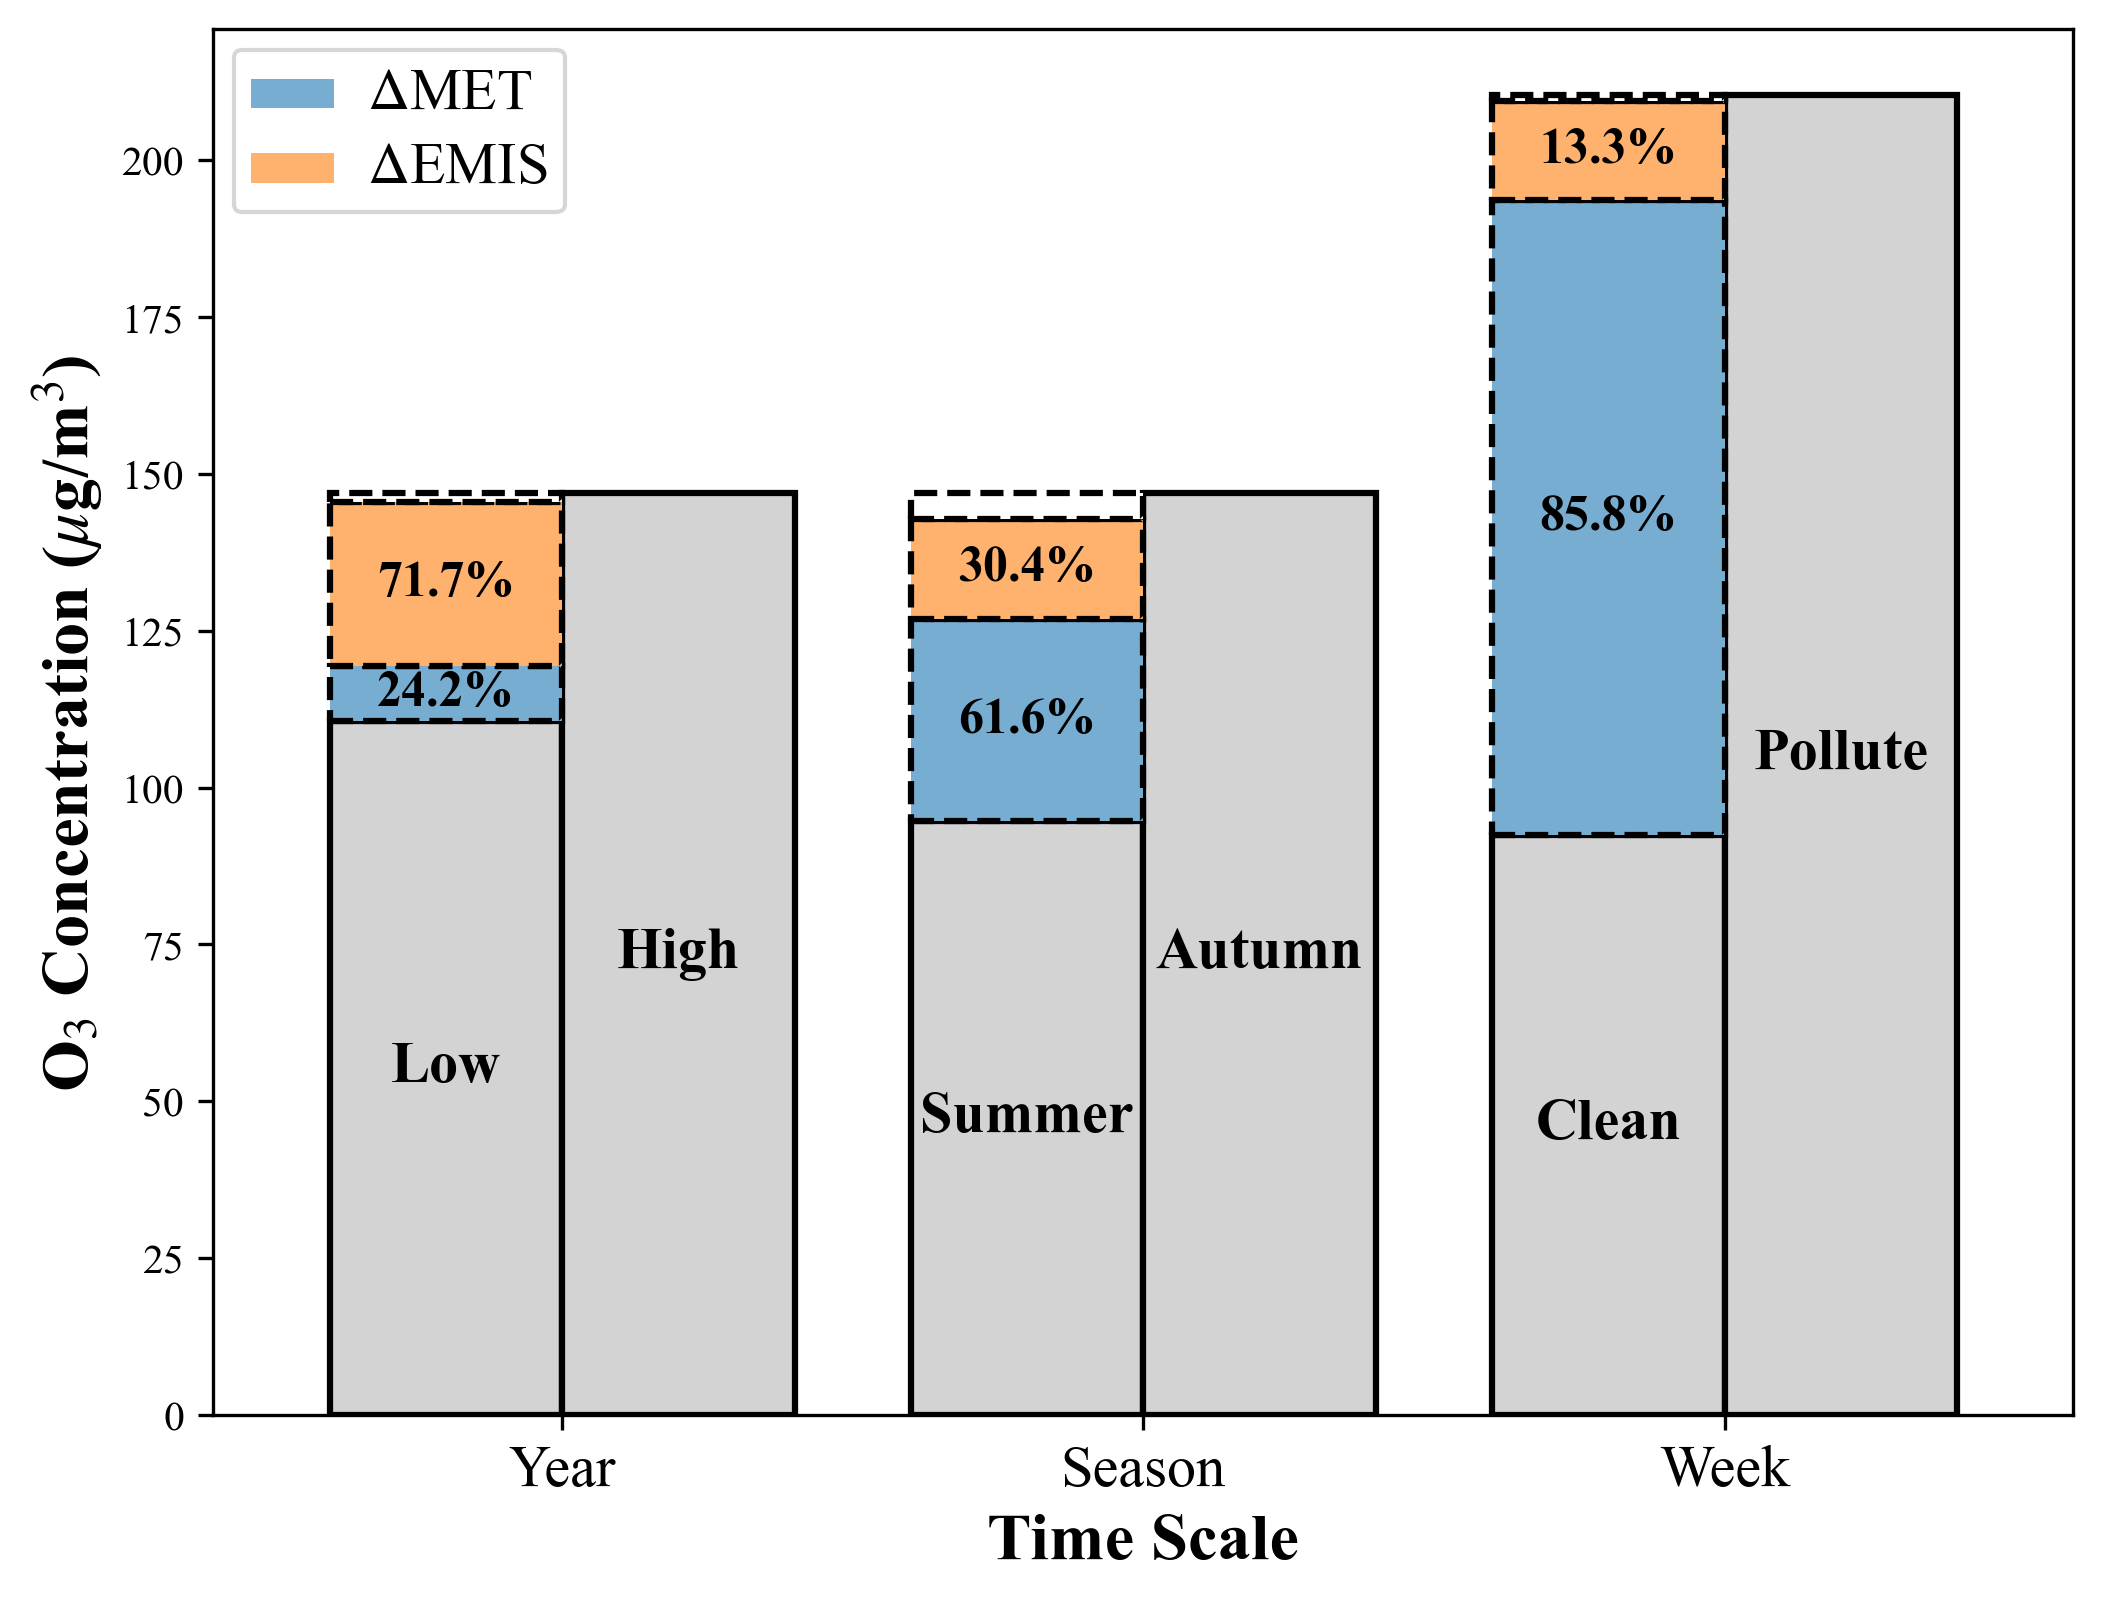

In [131]:
lowloc = 0
highloc = 1
summerloc = 2.5
autumnloc = 3.5
cleanloc = 5
polluteloc = 6

width0 = 1

fig = plt.figure(figsize=(8, 6),dpi=300)
ax = fig.subplots(1, 1)

ax.bar(lowloc,year_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(highloc,year_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(summerloc,season_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(autumnloc,season_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(cleanloc,week_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(polluteloc,week_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)

# ============================
# year
ax.bar(lowloc,year_box1,width=width0,bottom=year_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_box2,width=width0,bottom=year_bar1+year_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_bar2-year_bar1-year_box1-year_box2,width=width0,bottom=year_bar1+year_box1+year_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# season
ax.bar(summerloc,season_box1,width=width0,bottom=season_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_box2,width=width0,bottom=season_bar1+season_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_bar2-season_bar1-season_box1-season_box2,width=width0,bottom=season_bar1+season_box1+season_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# week
ax.bar(cleanloc,week_box1,width=width0,bottom=week_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_box2,width=width0,bottom=week_bar1+week_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_bar2-week_bar1-week_box1-week_box2,width=width0,bottom=week_bar1+week_box1+week_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# ============================
textdict = dict(fontsize=14,fontweight='bold',color='black',ha='center',va='center')
ratiodict = dict(fontsize=12,fontweight='bold',color='black',ha='center',va='center')
# Low
ax.text(lowloc,year_bar1/2,s='Low',**textdict)
ax.text(lowloc,year_bar1+year_box1/2,s=f'{year_ratio1:.1f}%',**ratiodict)
ax.text(lowloc,year_bar1+year_box1+year_box2/2,s=f'{year_ratio2:.1f}%',**ratiodict)
# High
ax.text(highloc,year_bar2/2,s='High',**textdict)

# Summer
ax.text(summerloc,season_bar1/2,s='Summer',**textdict)
ax.text(summerloc,season_bar1+season_box1/2,s=f'{season_ratio1:.1f}%',**ratiodict)
ax.text(summerloc,season_bar1+season_box1+season_box2/2,s=f'{season_ratio2:.1f}%',**ratiodict)
# Autumn
ax.text(autumnloc,year_bar2/2,s='Autumn',**textdict)

# Clean
ax.text(cleanloc,week_bar1/2,s='Clean',**textdict)
ax.text(cleanloc,week_bar1+week_box1/2,s=f'{week_ratio1:.1f}%',**ratiodict)
ax.text(cleanloc,week_bar1+week_box1+week_box2/2,s=f'{week_ratio2:.1f}%',**ratiodict)
# Pollute
ax.text(polluteloc,week_bar2/2,s='Pollute',**textdict)

# ============================
tickdict = dict(fontsize=14,fontweight='normal')
labeldict = dict(fontsize=16,fontweight='bold')
ax.set_xticks([(lowloc+highloc)/2,
               (summerloc+autumnloc)/2,
               (cleanloc+polluteloc)/2])
ax.set_xticklabels(['Year','Season','Week'],**tickdict)
# ax.set_yticks([])
ax.set_xlabel('Time Scale',**labeldict)
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)',**labeldict)

# ============================
ax.bar([0,0],[0,0],color=['#78add2','#ffb26e'],label=['$\Delta$MET','$\Delta$EMIS'])
lg = ax.legend(loc=2)
for text in lg.get_texts():
    text.set_fontsize(14)
    text.set_fontweight('normal')
    
ax.set_xlim(-1,7)
plt.show()

添加一个箭头试试：发现不能添加到画框外

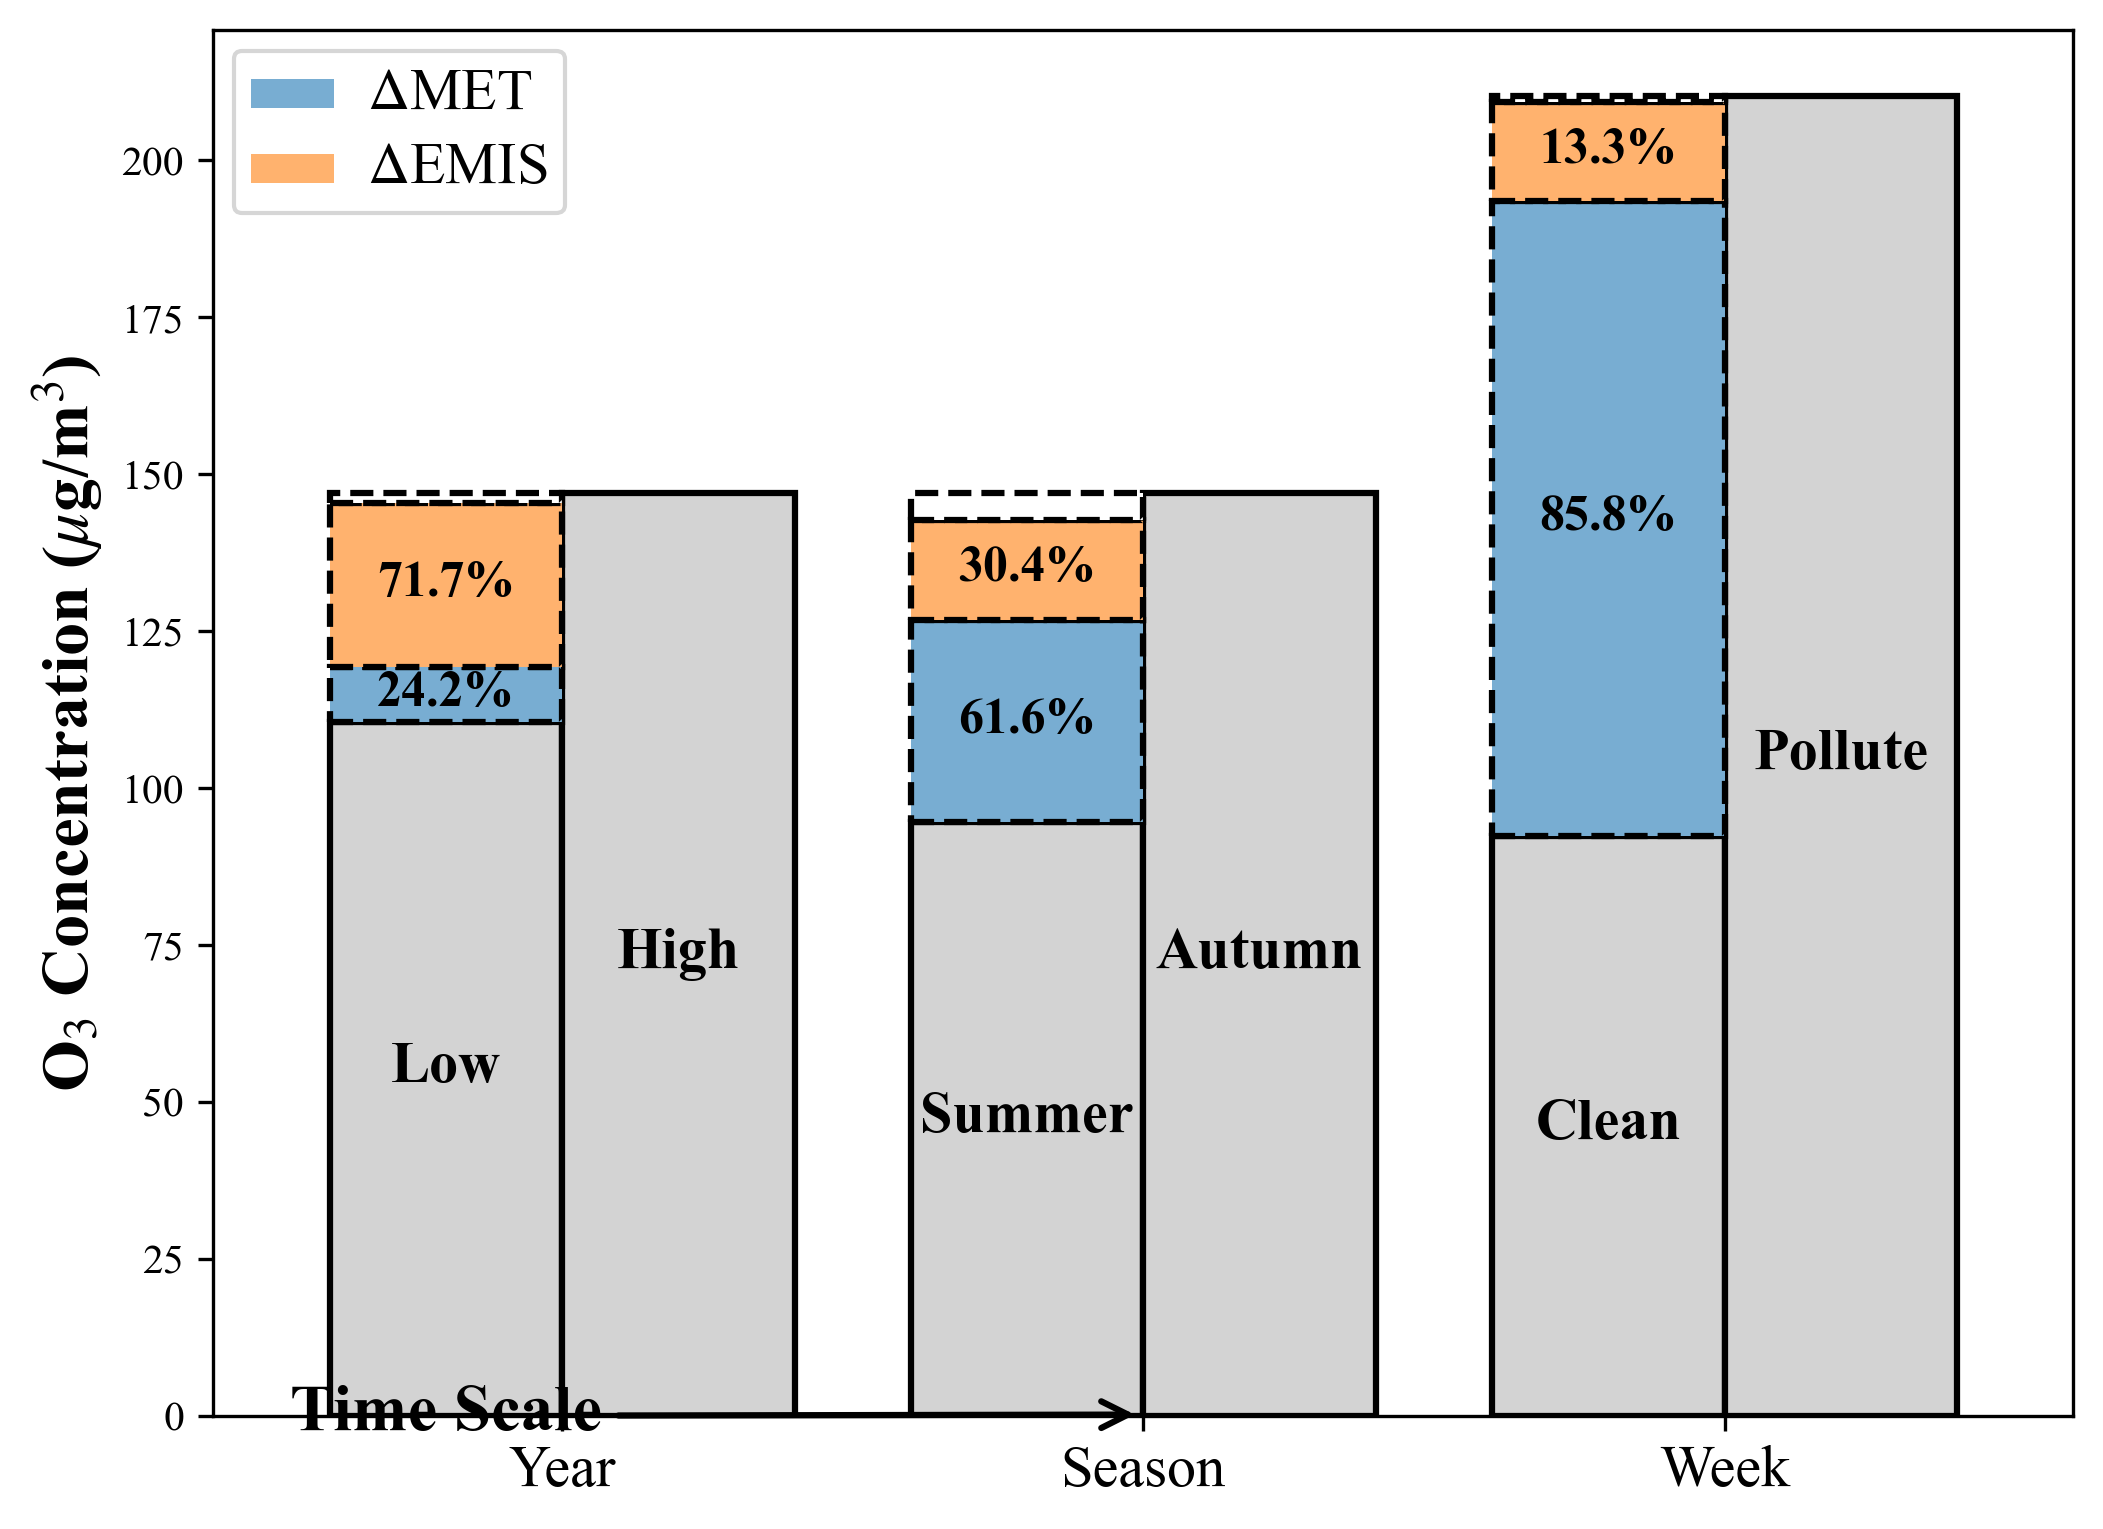

In [151]:
lowloc = 0
highloc = 1
summerloc = 2.5
autumnloc = 3.5
cleanloc = 5
polluteloc = 6

width0 = 1

fig = plt.figure(figsize=(8, 6),dpi=300)
ax = fig.subplots(1, 1)

ax.bar(lowloc,year_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(highloc,year_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(summerloc,season_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(autumnloc,season_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(cleanloc,week_bar1,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)
ax.bar(polluteloc,week_bar2,width=width0,color='lightgray',edgecolor='black',linewidth=1.5)

# ============================
# year
ax.bar(lowloc,year_box1,width=width0,bottom=year_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_box2,width=width0,bottom=year_bar1+year_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(lowloc,year_bar2-year_bar1-year_box1-year_box2,width=width0,bottom=year_bar1+year_box1+year_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# season
ax.bar(summerloc,season_box1,width=width0,bottom=season_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_box2,width=width0,bottom=season_bar1+season_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(summerloc,season_bar2-season_bar1-season_box1-season_box2,width=width0,bottom=season_bar1+season_box1+season_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# week
ax.bar(cleanloc,week_box1,width=width0,bottom=week_bar1,color='#78add2',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_box2,width=width0,bottom=week_bar1+week_box1,color='#ffb26e',edgecolor='black',linewidth=1.5,linestyle='--')
ax.bar(cleanloc,week_bar2-week_bar1-week_box1-week_box2,width=width0,bottom=week_bar1+week_box1+week_box2,color='w',edgecolor='black',linewidth=1.5,linestyle='--')

# ============================
textdict = dict(fontsize=14,fontweight='bold',color='black',ha='center',va='center')
ratiodict = dict(fontsize=12,fontweight='bold',color='black',ha='center',va='center')
# Low
ax.text(lowloc,year_bar1/2,s='Low',**textdict)
ax.text(lowloc,year_bar1+year_box1/2,s=f'{year_ratio1:.1f}%',**ratiodict)
ax.text(lowloc,year_bar1+year_box1+year_box2/2,s=f'{year_ratio2:.1f}%',**ratiodict)
# High
ax.text(highloc,year_bar2/2,s='High',**textdict)

# Summer
ax.text(summerloc,season_bar1/2,s='Summer',**textdict)
ax.text(summerloc,season_bar1+season_box1/2,s=f'{season_ratio1:.1f}%',**ratiodict)
ax.text(summerloc,season_bar1+season_box1+season_box2/2,s=f'{season_ratio2:.1f}%',**ratiodict)
# Autumn
ax.text(autumnloc,year_bar2/2,s='Autumn',**textdict)

# Clean
ax.text(cleanloc,week_bar1/2,s='Clean',**textdict)
ax.text(cleanloc,week_bar1+week_box1/2,s=f'{week_ratio1:.1f}%',**ratiodict)
ax.text(cleanloc,week_bar1+week_box1+week_box2/2,s=f'{week_ratio2:.1f}%',**ratiodict)
# Pollute
ax.text(polluteloc,week_bar2/2,s='Pollute',**textdict)

# ============================
tickdict = dict(fontsize=14,fontweight='normal')
labeldict = dict(fontsize=16,fontweight='bold')
ax.set_xticks([(lowloc+highloc)/2,
               (summerloc+autumnloc)/2,
               (cleanloc+polluteloc)/2])
ax.set_xticklabels(['Year','Season','Week'],**tickdict)
# ax.set_yticks([])
# ax.set_xlabel('Time Scale',**labeldict)
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)',**labeldict)

# ============================
ax.bar([0,0],[0,0],color=['#78add2','#ffb26e'],label=['$\Delta$MET','$\Delta$EMIS'])
lg = ax.legend(loc=2)
for text in lg.get_texts():
    text.set_fontsize(14)
    text.set_fontweight('normal')

# arrow
plt.annotate('Time Scale', xy=(3, 0.2), xytext=(0, 0.),transform=ax.transAxes,ha='center',va='center',
            arrowprops=dict(facecolor='black', arrowstyle='->',linewidth=1.5),**labeldict)

ax.set_xlim(-1,7)
plt.show()